<a href="https://colab.research.google.com/github/Pedrocoellho/time_series_forecasts_company_bicycles/blob/main/complete_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Preparing and processing the data**

###**Importing the data**

> Você pode checar a documentação da biblioteca Pandas [aqui](https://pandas.pydata.org/).

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')

In [ ]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


###**Handling null data**

In [ ]:
df.shape

(17429, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


>You can find detailed information about the interpolate() method of the Pandas library [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html).

In [ ]:
df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')

In [ ]:
df.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


###**Identifying and Removing Duplicate Data**

In [ ]:
df.duplicated().sum()

15

In [ ]:
# Identificando as linhas duplicadas no DataFrame
duplicatas = df.duplicated(keep=False)

# Selecionando as linhas duplicadas com base no resultado anterior
linhas_duplicadas = df[duplicatas]

# Ordenando as linhas duplicadas pela coluna 'data_hora'
linhas_duplicadas.sort_values(by='data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [ ]:
df_limpo = df.drop_duplicates()

In [ ]:
df_limpo.shape

(17414, 10)

##**Exploring numerical data**

###**Obtaining descriptive statistics**

In [ ]:
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


###**Analyzing distributions**

> Library documentation can be found at the following links:
> * [Seaborn: Statistical Data Visualization](https://seaborn.pydata.org/)
> * [Matplotlib: Visualization with Python](https://matplotlib.org/)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

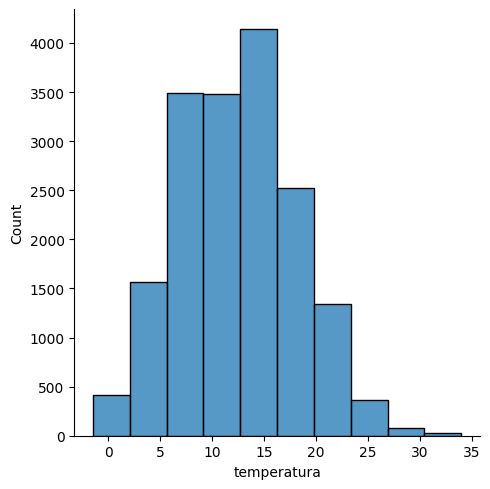

In [ ]:
sns.displot(df_limpo['temperatura'], bins = 10)
plt.show()

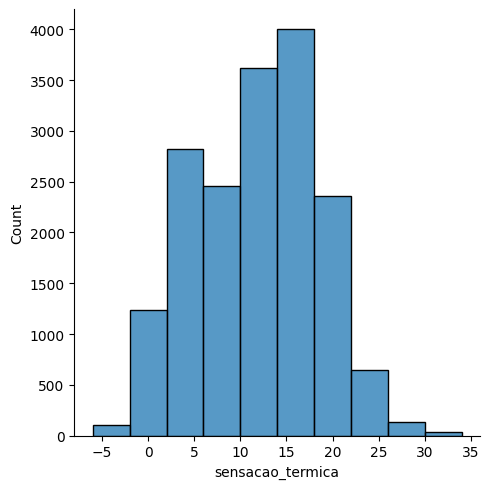

In [ ]:
sns.displot(df_limpo['sensacao_termica'], bins = 10)
plt.show()

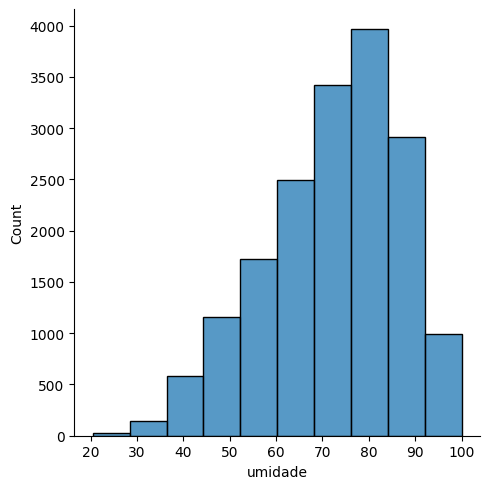

In [ ]:
sns.displot(df_limpo['umidade'], bins = 10)
plt.show()

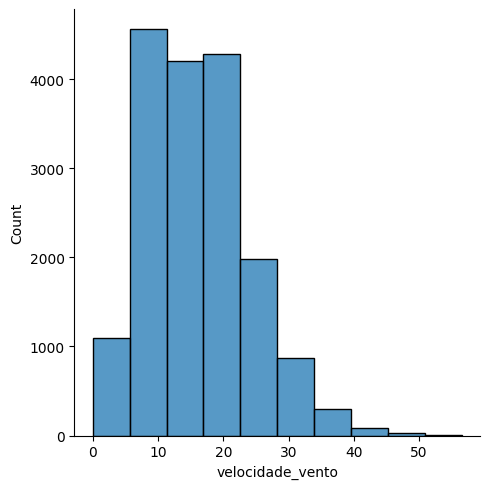

In [ ]:
sns.displot(df_limpo['velocidade_vento'], bins = 10)
plt.show()

###**Investigando relações entre variáveis**

> **Prompt:** Crie 4 gráficos do tipo scatterplot das variáveis temperatura, sensacao_termica, umidade, velocidade_vento com a coluna contagem no eixo y. deixar os gráficos na posição 2X2. Cada gráfico deve ter um título.

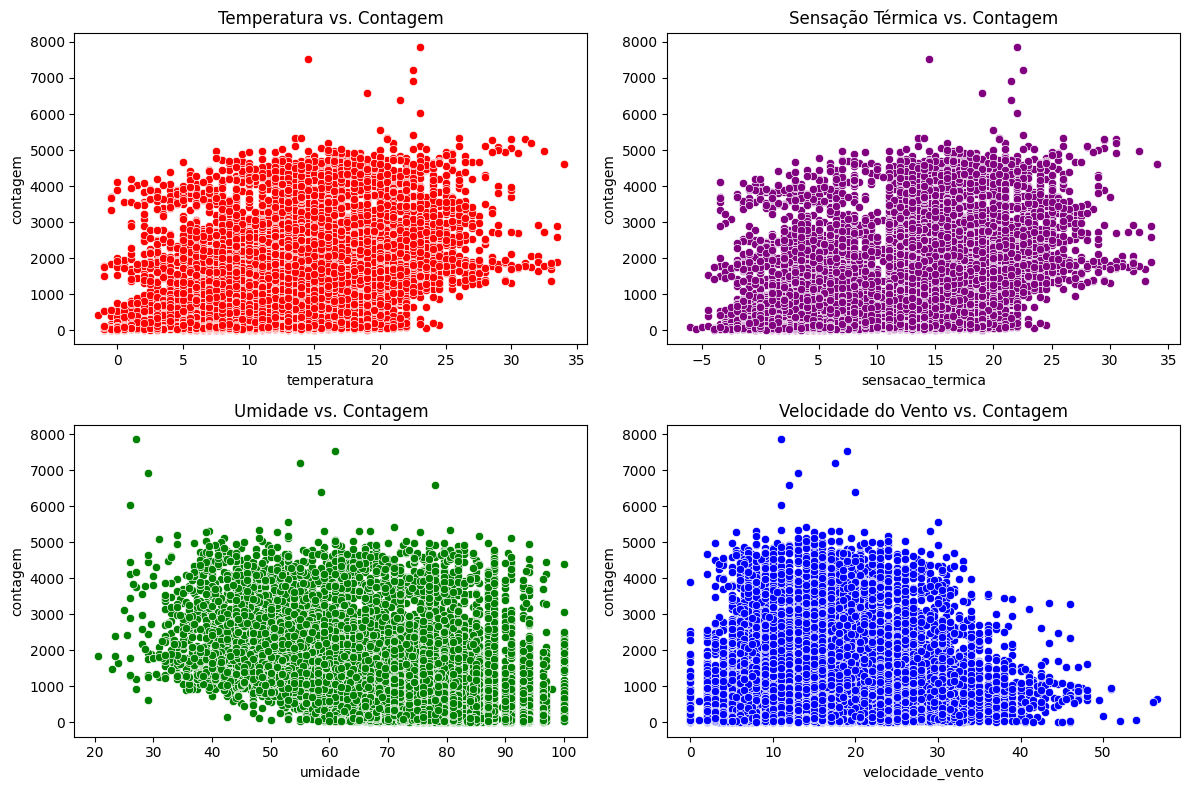

In [ ]:
# prompt: Crie 4 gráficos do tipo scatterplot das variáveis temperatura, sensacao_termica, umidade, velocidade_vento com a coluna contagem no eixo y. deixar os gráficos na posição 2X2. Cada gráfico deve ter um título.

import matplotlib.pyplot as plt

# Crie a figura e os eixos
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plotagem dos scatterplots
sns.scatterplot(ax=axes[0, 0], x='temperatura', y='contagem',color = 'red', data=df_limpo)
axes[0, 0].set_title('Temperatura vs. Contagem')

sns.scatterplot(ax=axes[0, 1], x='sensacao_termica', y='contagem', color = 'purple', data=df_limpo)
axes[0, 1].set_title('Sensação Térmica vs. Contagem')

sns.scatterplot(ax=axes[1, 0], x='umidade', y='contagem',color = 'green', data=df_limpo)
axes[1, 0].set_title('Umidade vs. Contagem')

sns.scatterplot(ax=axes[1, 1], x='velocidade_vento', y='contagem',color = 'blue', data=df_limpo)
axes[1, 1].set_title('Velocidade do Vento vs. Contagem')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Exiba o gráfico
plt.show()

###**Examinando a correlação entre as variáveis**

Correlação é uma medida estatística que descreve a relação entre duas variáveis. Existem diferentes tipos de correlação, mas a correlação de Pearson é uma das mais comuns. A correlação de Pearson mede a força e a direção de uma relação linear entre duas variáveis. Ela produz um valor de correlação que varia de -1 a 1.

> Você pode encontrar informações detalhadas sobre o método *corr()* da biblioteca Pandas [aqui](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

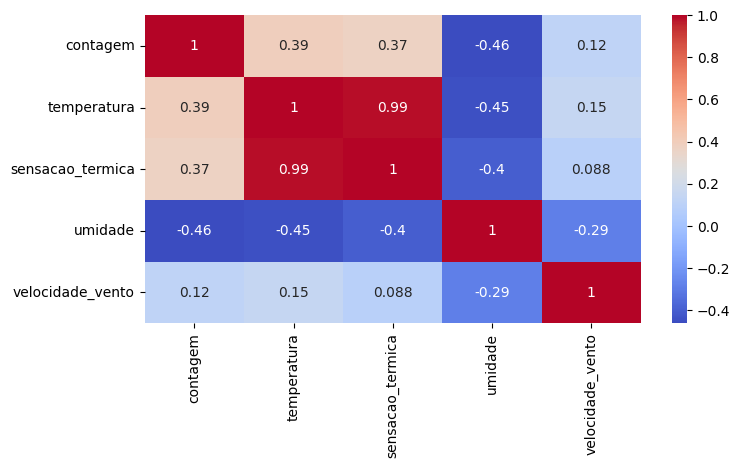

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

##**Aula 3: Explorando os dados categóricos**

###**Obtendo estatísticas descritivas**

In [ ]:
df_limpo.describe(include='object')

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [ ]:
for col in ['clima','feriado','fim_de_semana','estacao']:
  print(f'Coluna: {col}')
  print(df_limpo[col].unique())
  print('-'*45, '\n')

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']
--------------------------------------------- 

Coluna: feriado
['Não' 'Sim']
--------------------------------------------- 

Coluna: fim_de_semana
['Sim' 'Não']
--------------------------------------------- 

Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']
--------------------------------------------- 



###**Comparando dias normais, feriados e finais de semana**

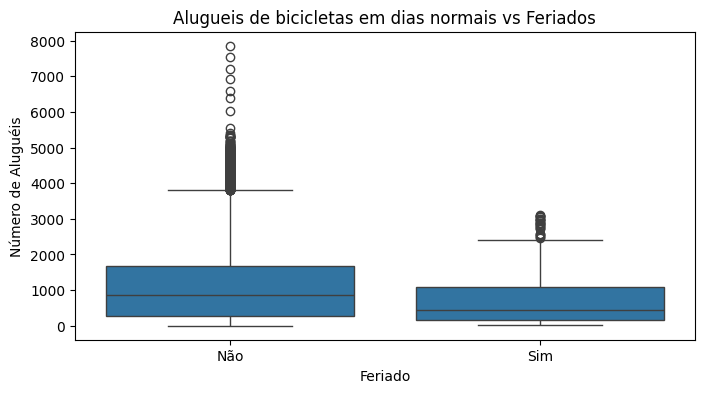

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='feriado', y='contagem', data=df_limpo)
plt.title('Alugueis de bicicletas em dias normais vs Feriados')
plt.xlabel('Feriado')
plt.ylabel('Número de Aluguéis')
plt.show()

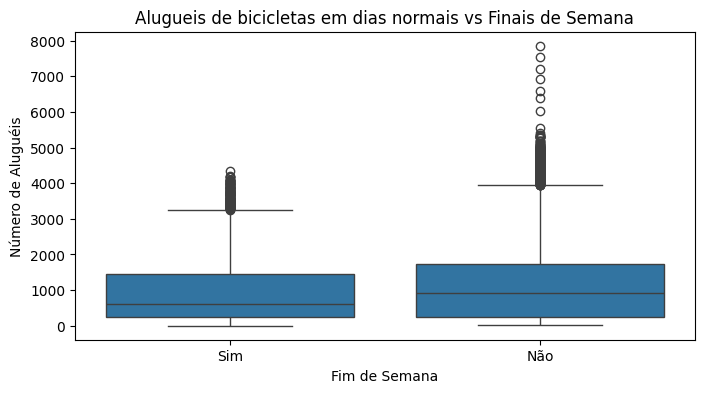

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='fim_de_semana', y='contagem', data=df_limpo)
plt.title('Alugueis de bicicletas em dias normais vs Finais de Semana')
plt.xlabel('Fim de Semana')
plt.ylabel('Número de Aluguéis')
plt.show()

In [ ]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()

In [ ]:
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [ ]:
mediana_fim_de_semana

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


###**Investigando como o clima afeta a demanda**

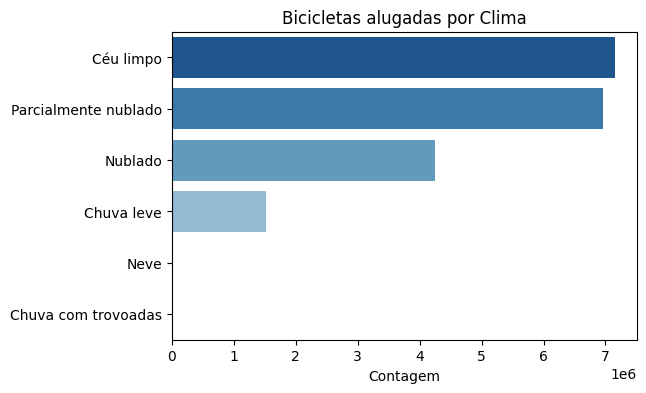

In [ ]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h', data=df_clima)
plt.title('Bicicletas alugadas por Clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

In [ ]:
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


###**Analisando as distribuições por estação**

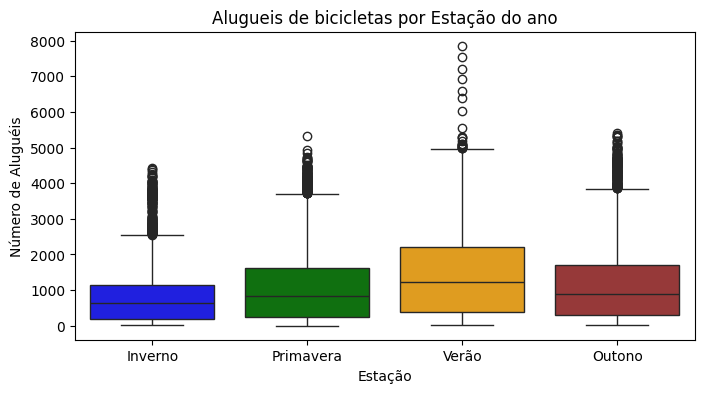

In [ ]:
plt.figure(figsize=(8, 4))
paleta_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown', 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=df_limpo, hue = 'estacao', palette = paleta_cores)
plt.title('Alugueis de bicicletas por Estação do ano')
plt.xlabel('Estação')
plt.ylabel('Número de Aluguéis')
plt.show()

In [ ]:
df_limpo.groupby('estacao')['contagem'].median()

,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


Formulando as hipóteses:

$H_0:$ As distribuições são iguais.\
$H_1:$ As distribuições são diferentes.

> Você pode encontrar informações detalhadas sobre o *mannwhitneyu* da biblioteca scipy [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).

O *p value* menor que 0.05 sugere que os resultados observados são improváveis de ocorrerem apenas por acaso. Portanto, rejeitamos a hipótese nula em favor da hipótese alternativa, concluindo que há evidências estatisticamente significativas para suportar a hipótese alternativa.

In [ ]:
from scipy.stats import mannwhitneyu

primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
u_statistic, p_value

(9044682.5, 0.0004762100221646296)

##**Analisando os dados ao longo do tempo**

###**Convertendo tipos de dados**

In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
df_data = df_limpo.copy()

In [ ]:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
df_data['mes'] = df_data['data_hora'].dt.month
df_data['horario'] = df_data['data_hora'].dt.hour

In [ ]:
df_data['data_hora'] = df_data['data_hora'].dt.date

df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [ ]:
df_data = df_data.rename(columns={'data_hora': 'data'})

df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
df_data['data'] = pd.to_datetime(df_data['data'])

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 2.1+ MB


###**Analisando a demanda por horário**

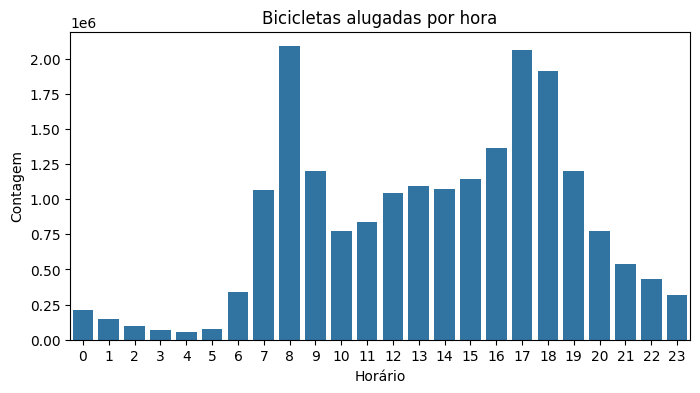

In [ ]:
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=df_por_hora)
plt.title('Bicicletas alugadas por hora')
plt.xlabel('Horário')
plt.ylabel('Contagem')
plt.show()

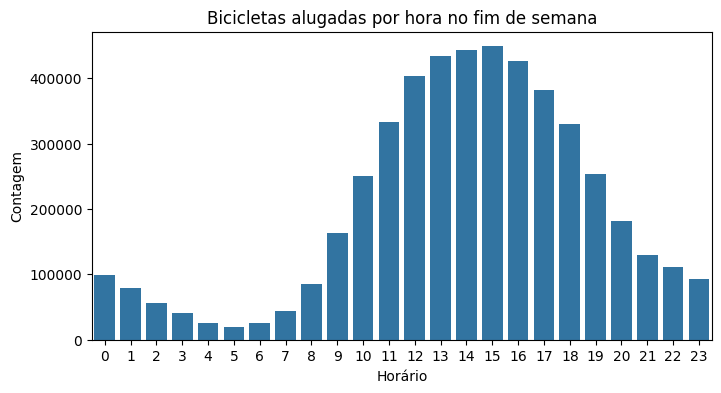

In [ ]:
df_fim_de_semana = df_data[df_data['fim_de_semana'] == 'Sim']

alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=alugueis_fim_de_semana)
plt.title('Bicicletas alugadas por hora no fim de semana')
plt.xlabel('Horário')
plt.ylabel('Contagem')
plt.show()

###**Analisando a demanda por dia e mês**

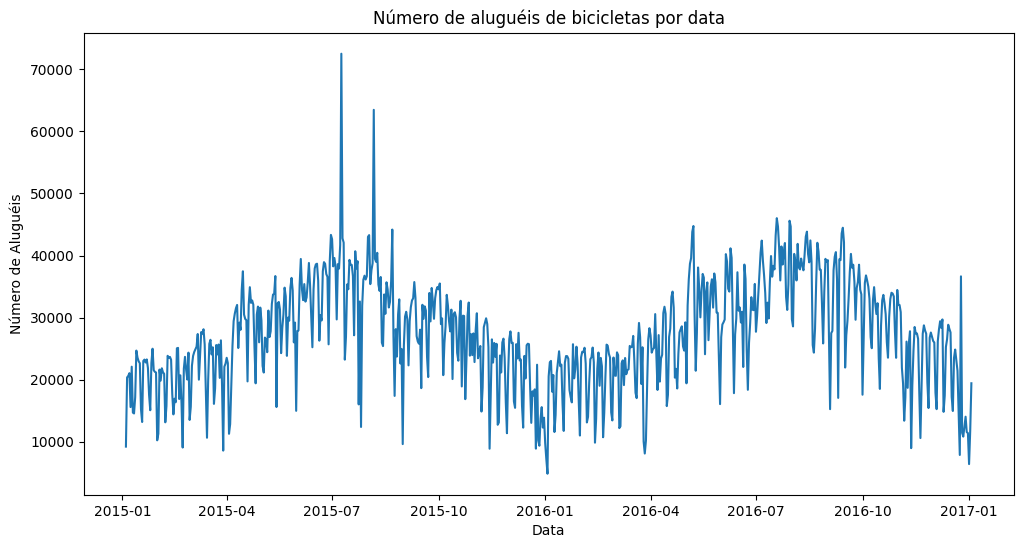

In [ ]:
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='data', y='contagem', data=df_tempo)
plt.title('Número de aluguéis de bicicletas por data')
plt.xlabel('Data')
plt.ylabel('Número de Aluguéis')
plt.show()

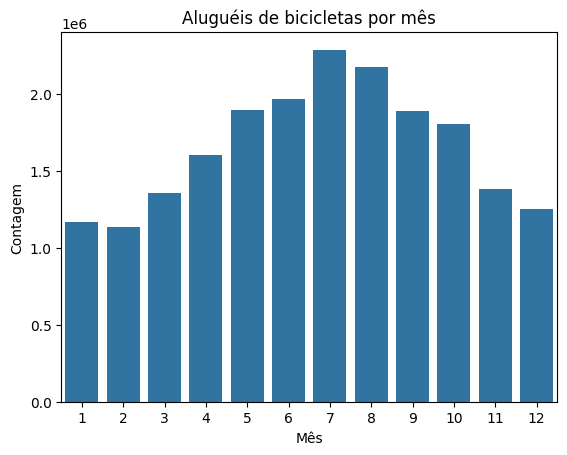

In [ ]:
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()

sns.barplot(x='mes', y='contagem', data=alugueis_mensais)
plt.title('Aluguéis de bicicletas por mês')
plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.show()

##**Construindo o modelo preditivo**

###**Realizando a previsão**

> Você pode checar a documentação da biblioteca Prophet [aqui](https://facebook.github.io/prophet/).

In [ ]:
from prophet import Prophet

In [ ]:
df_prophet = df_data[['data', 'contagem']].rename(columns={'data': 'ds', 'contagem': 'y'})
df_prophet.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [ ]:
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
import numpy as np

np.random.seed(4587)


modelo = Prophet()

modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=90, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_hdh6or/ds6eekkb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_hdh6or/7ijgki36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9275', 'data', 'file=/tmp/tmp9_hdh6or/ds6eekkb.json', 'init=/tmp/tmp9_hdh6or/7ijgki36.json', 'output', 'file=/tmp/tmp9_hdh6or/prophet_modelf5orftny/prophet_model-20250124191605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:16:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:16:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


###**Explorando os resultados da previsão**

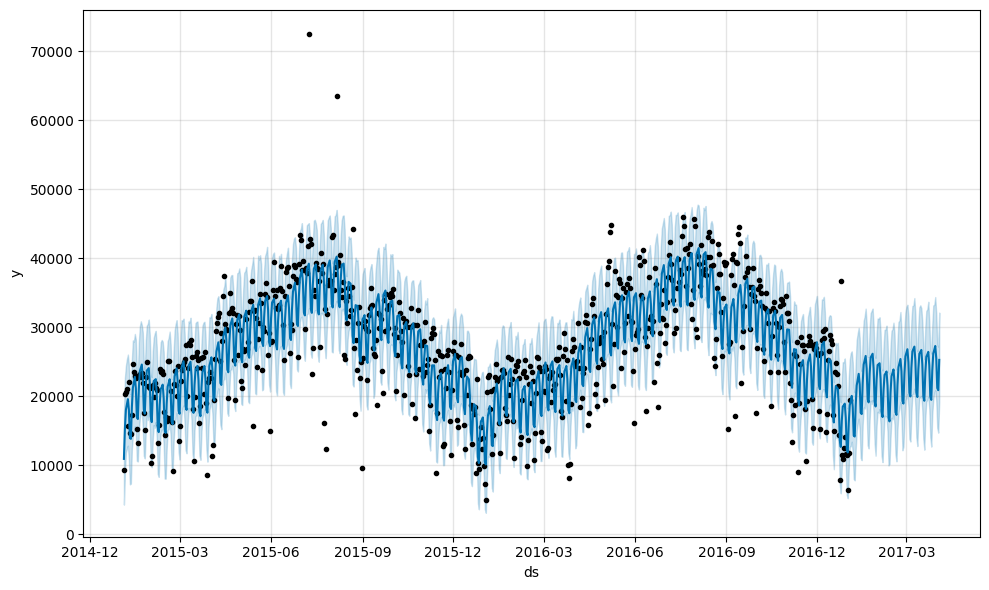

In [ ]:
fig1 = modelo.plot(previsao)

In [ ]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4272.992256,17164.501687
1,2015-01-05,15311.232708,8913.287413,22636.582586
2,2015-01-06,18014.350866,11829.942639,24414.201504
3,2015-01-07,18744.719144,12344.154062,25364.884607
4,2015-01-08,19556.191727,12809.812197,26023.639264
...,...,...,...,...
815,2017-03-30,27262.740955,20840.917738,34360.842038
816,2017-03-31,25490.750990,19305.507172,31997.954460
817,2017-04-01,21173.750109,15400.577315,27665.232260
818,2017-04-02,20856.740496,14700.917577,27176.730648


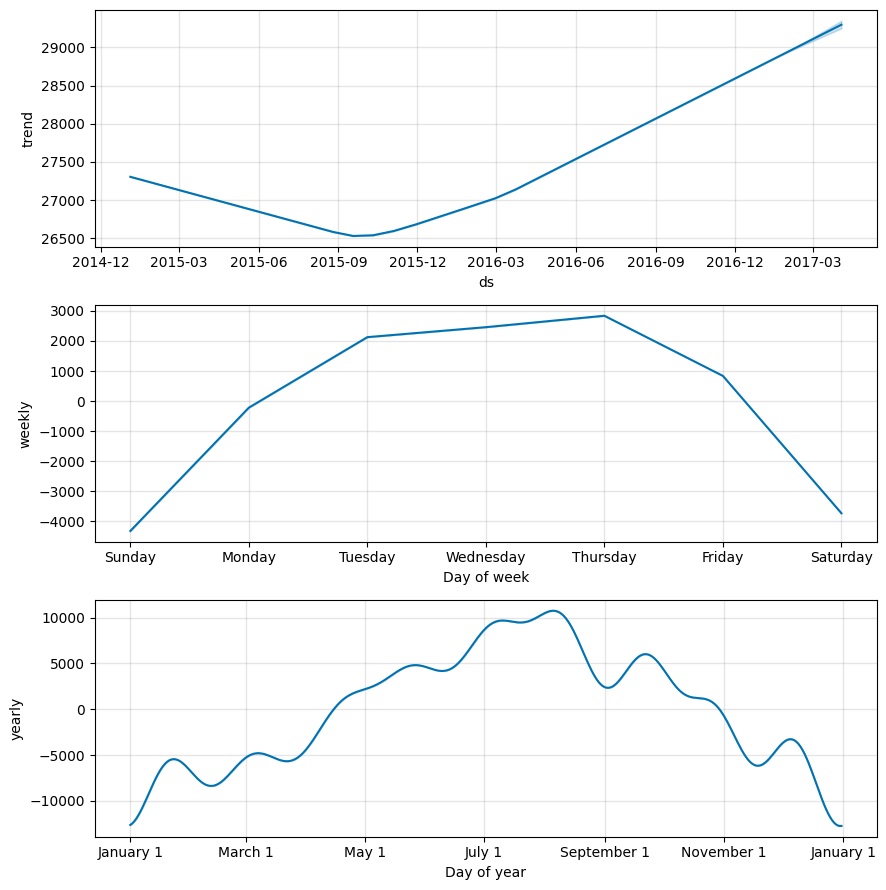

In [ ]:
fig2 = modelo.plot_components(previsao)

A biblioteca Prophet usa um modelo aditivo que inclui componentes sazonais e de tendência. A equação utilizada pelo Prophet para realizar previsões pode ser representada da seguinte forma:

$y(t) = g(t) + s(t) + h(t) + \epsilon_t$

Onde:

- $ y(t)$ é o valor observado na série temporal no tempo \( t \).
- $ g(t) $ é a componente de tendência que modela mudanças de longo prazo.
- $ s(t) $ é a componente sazonal que modela padrões periódicos ou sazonais.
- $ h(t) $ é a componente de efeito de feriados
- $\epsilon_t$ é o erro aleatório na previsão.

Cada uma dessas componentes é modelada separadamente. A componente de tendência, $ g(t)$, é frequentemente modelada como uma função logística ou polinomial. A componente sazonal, $s(t)$, é modelada usando a análise de Fourier para capturar padrões periódicos. A componente de feriado, $h(t)$, é modelada como um efeito aditivo para cada feriado especificado.

Portanto, a equação completa usada pelo Prophet para realizar previsões é uma soma desses componentes mais o erro aleatório.

> Embora em nosso projeto não tenhamos detalhado a inclusão dos feriados no modelo, é importante ressaltar que essa possibilidade existe.


###**Separando os dados em treino e teste**

Separar os dados em conjuntos de treino e teste é fundamental em modelos de série temporal para avaliar a capacidade de generalização do modelo. Imagine que você está treinando um modelo para prever o número de vendas de uma empresa. Se você treinar o modelo com todos os dados disponíveis e depois testá-lo com os mesmos dados, ele pode parecer ótimo, mas na prática pode falhar em prever o futuro.

Isso acontece porque o modelo pode simplesmente memorizar os padrões específicos dos dados de treinamento, sem realmente aprender a identificar padrões gerais que se aplicam a novos dados. Ao separar os dados em treino e teste, você simula o cenário de previsão futura, garantindo que o modelo seja avaliado em sua capacidade de generalização, ou seja, em sua habilidade de fazer previsões precisas em dados que nunca viu antes. Isso ajuda a garantir que o modelo seja robusto e confiável quando usado para fazer previsões no mundo real.

In [ ]:
df_prophet.shape

(730, 2)

In [ ]:
df_treino = pd.DataFrame()

df_treino['ds'] = df_prophet['ds'].iloc[:584]
df_treino['y'] = df_prophet['y'].iloc[:584]

In [ ]:
df_teste = pd.DataFrame()

df_teste['ds'] = df_prophet['ds'].iloc[584:]
df_teste['y'] = df_prophet['y'].iloc[584:]

In [ ]:
np.random.seed(4587)


modelo = Prophet()

modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_hdh6or/j9nega7i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_hdh6or/6eu37iei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60868', 'data', 'file=/tmp/tmp9_hdh6or/j9nega7i.json', 'init=/tmp/tmp9_hdh6or/6eu37iei.json', 'output', 'file=/tmp/tmp9_hdh6or/prophet_modelgpvvlq_v/prophet_model-20250124191606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:16:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:16:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


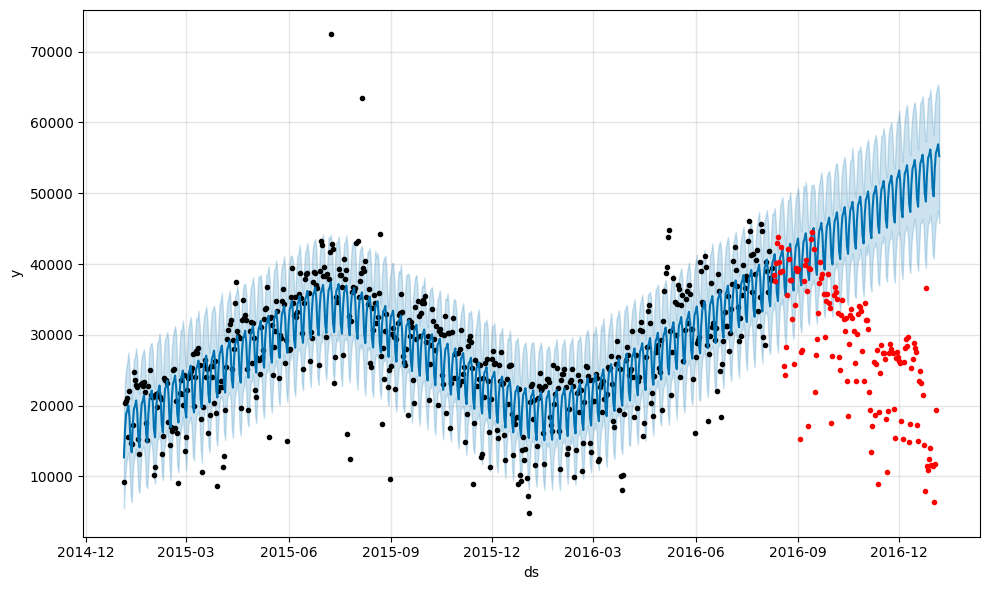

In [ ]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

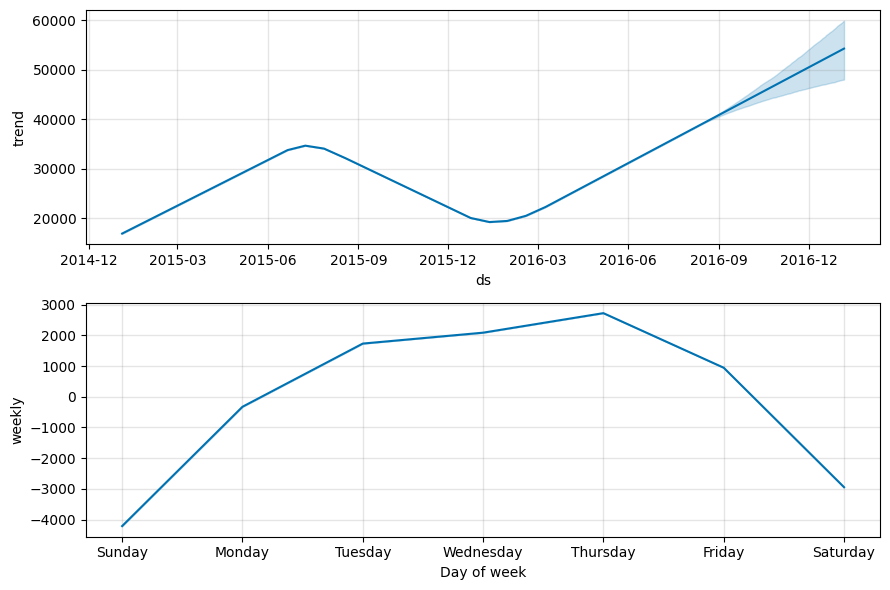

In [ ]:
fig2 = modelo.plot_components(previsao)

###**Obtendo métricas**

In [ ]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,40646.666399,38430
1,2016-08-11,41387.553580,37626
2,2016-08-12,39717.735888,40159
3,2016-08-13,35936.820545,43041
4,2016-08-14,34777.785741,43848
...,...,...,...
141,2016-12-30,54505.511686,11566
142,2016-12-31,50724.596343,11424
143,2017-01-01,49565.561539,6421
144,2017-01-02,53551.536790,11823


A métrica MSE *(Mean Squared Error)* é uma medida comum de avaliação de desempenho para modelos de regressão e previsão. Ela calcula a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais observados nos dados de teste. Matematicamente, o MSE é calculado pela fórmula:

$MSE = \frac{\sum_{} (y_i - \hat{y}_i)^2}{n}$

No entanto, o MSE tem uma limitação: suas unidades são quadráticas em relação às unidades originais dos dados. Isso pode tornar difícil interpretar o seu valor
Para superar essa limitação, muitas vezes é preferível usar o RMSE *(Root Mean Squared Error)*. O RMSE é simplesmente a raiz quadrada do MSE e é calculado pela fórmula:

$RMSE = \sqrt{MSE}$


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:466132050.6184666, RMSE:21590.09149166503


##**Melhorando as previsões**

###**Ajustando os dados**

In [ ]:
np.random.seed(4587)


modelo = Prophet(yearly_seasonality=True)

modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_hdh6or/w9qhzj_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_hdh6or/s455vkc2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85226', 'data', 'file=/tmp/tmp9_hdh6or/w9qhzj_s.json', 'init=/tmp/tmp9_hdh6or/s455vkc2.json', 'output', 'file=/tmp/tmp9_hdh6or/prophet_modelyt3dqyc5/prophet_model-20250124195133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:51:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:51:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


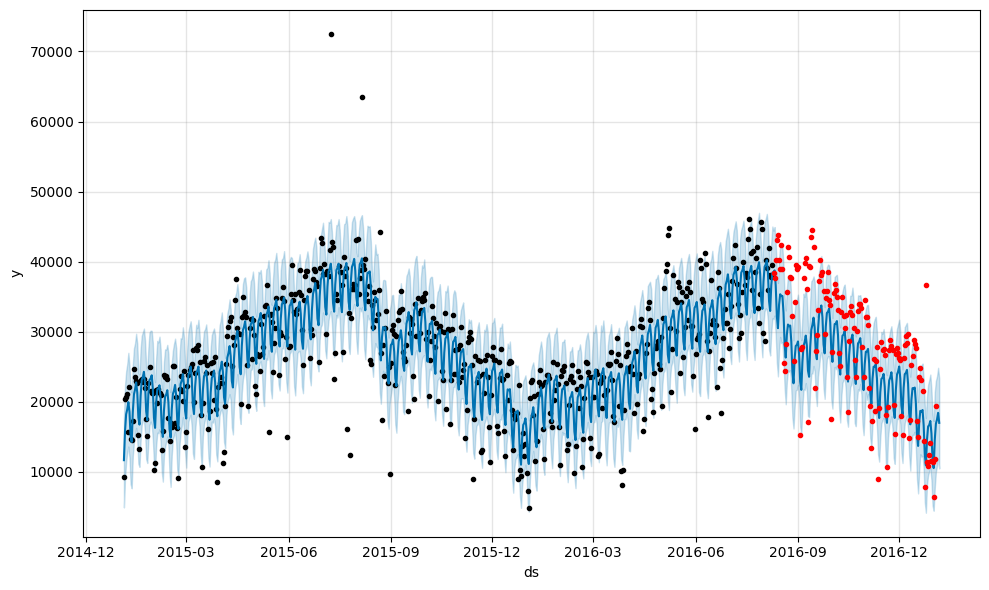

In [ ]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

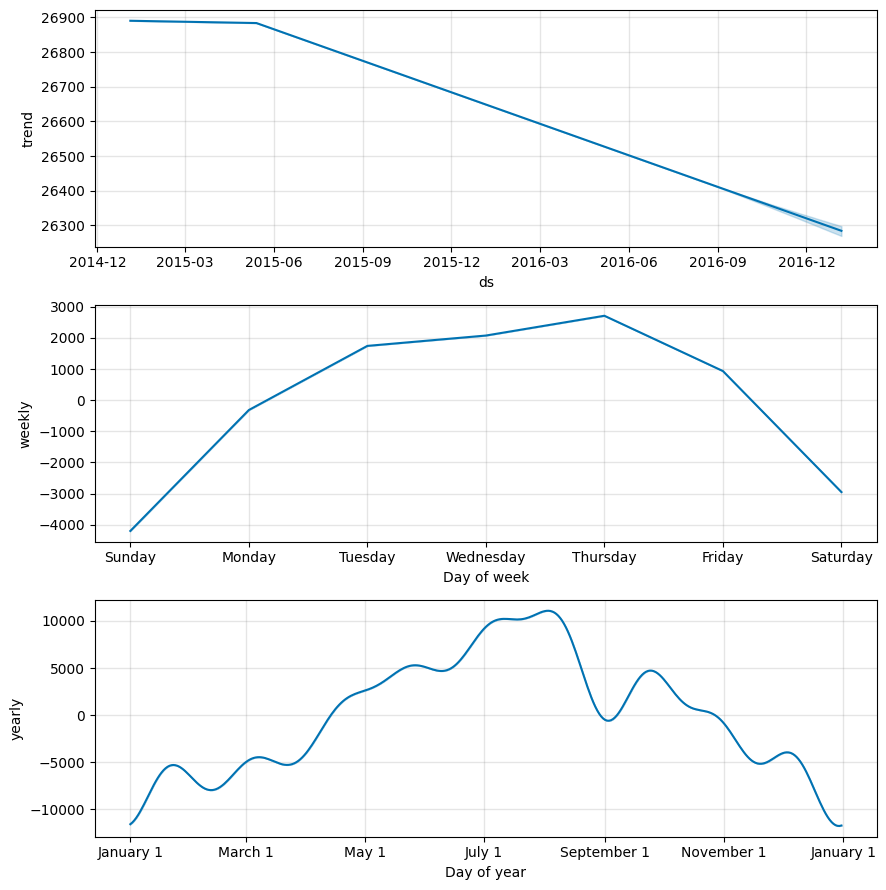

In [ ]:
fig2 = modelo.plot_components(previsao)

In [ ]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38465.369605,38430
1,2016-08-11,38747.157010,37626
2,2016-08-12,36570.384861,40159
3,2016-08-13,32236.934232,43041
4,2016-08-14,30495.324496,43848
...,...,...,...
141,2016-12-30,15472.686807,11566
142,2016-12-31,11648.789994,11424
143,2017-01-01,10517.646095,6421
144,2017-01-02,14573.011741,11823


In [ ]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:38623883.499975376, RMSE:6214.8116222437


###**Tratando os outliers**

In [ ]:
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_hdh6or/vxcu43hq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_hdh6or/0dcezzon.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17762', 'data', 'file=/tmp/tmp9_hdh6or/vxcu43hq.json', 'init=/tmp/tmp9_hdh6or/0dcezzon.json', 'output', 'file=/tmp/tmp9_hdh6or/prophet_model72lcdan0/prophet_model-20250124200250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:02:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:02:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]

In [ ]:
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
df_treino = pd.DataFrame()

df_treino['ds'] = sem_outliers['ds'].iloc[:505]
df_treino['y'] = sem_outliers['y'].iloc[:505]

In [ ]:
df_teste = pd.DataFrame()

df_teste['ds'] = sem_outliers['ds'].iloc[505:]
df_teste['y'] = sem_outliers['y'].iloc[505:]

###**Treinando com os dados tratados**

In [ ]:
np.random.seed(4587)


modelo_sem_outliers = Prophet(yearly_seasonality=True)

modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=150, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_hdh6or/vl04f1rh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_hdh6or/be3b3uxf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46509', 'data', 'file=/tmp/tmp9_hdh6or/vl04f1rh.json', 'init=/tmp/tmp9_hdh6or/be3b3uxf.json', 'output', 'file=/tmp/tmp9_hdh6or/prophet_model9nsii7fp/prophet_model-20250124201127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:11:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:11:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


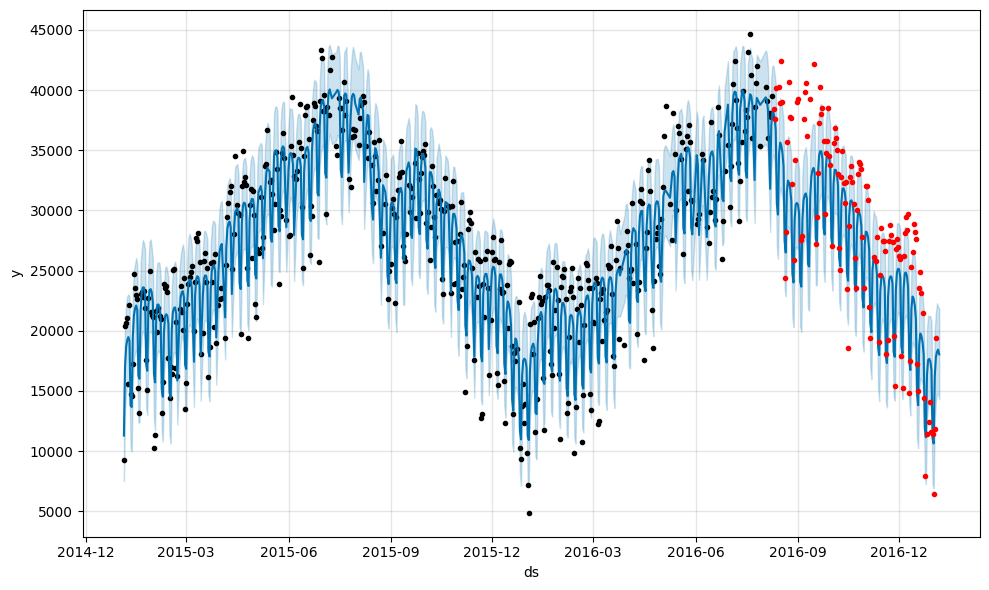

In [ ]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [ ]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38124.205916,38430
1,2016-08-11,37708.703632,37626
2,2016-08-12,36664.046726,40159
3,2016-08-15,34692.056037,40236
4,2016-08-16,35633.113613,38911
...,...,...,...
121,2016-12-30,16752.064183,11566
122,2016-12-31,11045.380016,11424
123,2017-01-01,10626.497538,6421
124,2017-01-02,16230.512446,11823


In [ ]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:15672925.764235971, RMSE:3958.904616713564


###**Expandindo o período de previsão**

In [ ]:
np.random.seed(4587)


modelo_sem_outliers = Prophet(yearly_seasonality=True)

modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=365, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_hdh6or/ij_lqu6y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_hdh6or/105d20jf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93237', 'data', 'file=/tmp/tmp9_hdh6or/ij_lqu6y.json', 'init=/tmp/tmp9_hdh6or/105d20jf.json', 'output', 'file=/tmp/tmp9_hdh6or/prophet_modelfi92vao8/prophet_model-20250124201656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:16:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:16:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()

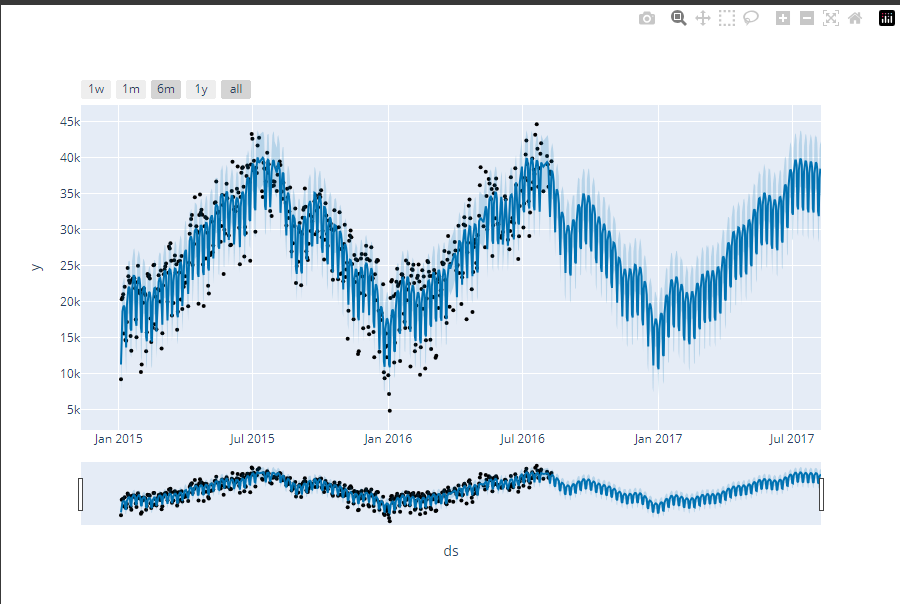